In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv("assets/data/pump_audio_dataset.csv", header= None)
dataset.head()

,0,1,2,3,4,5
0,-321.43700,64.59506,-18.534182,23.852745,-7.886702,pump_abnormal
1,-324.74274,63.63527,-15.678257,15.320222,-13.186565,pump_abnormal
2,-357.58588,63.78808,-13.550884,36.483120,-1.093753,pump_abnormal
3,-323.02450,69.02813,-14.276696,18.844723,-7.725409,pump_abnormal
4,-322.18020,69.62999,-14.823904,18.698212,-7.220741,pump_abnormal


In [3]:
dataset.columns= ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','class']

In [4]:
dataset['class'].value_counts()

pump_normal      3749
pump_abnormal     456
Name: class, dtype: int64

In [5]:
data_matrics = dataset.drop('class', axis = 1)
data_matrics.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5
0,-321.43700,64.59506,-18.534182,23.852745,-7.886702
1,-324.74274,63.63527,-15.678257,15.320222,-13.186565
2,-357.58588,63.78808,-13.550884,36.483120,-1.093753
3,-323.02450,69.02813,-14.276696,18.844723,-7.725409
4,-322.18020,69.62999,-14.823904,18.698212,-7.220741


In [6]:
data_matrics_normalized=(data_matrics-data_matrics.mean())/data_matrics.std()

In [7]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(data_matrics_normalized)
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
# data_matrics = data_matrics.join(cluster_labels.to_frame())
# data_matrics.tail()

In [8]:
cluster_labels.value_counts()

1    3104
0    1101
Name: cluster, dtype: int64

In [9]:
data_matrics_kmean = data_matrics_normalized.join(cluster_labels.to_frame())

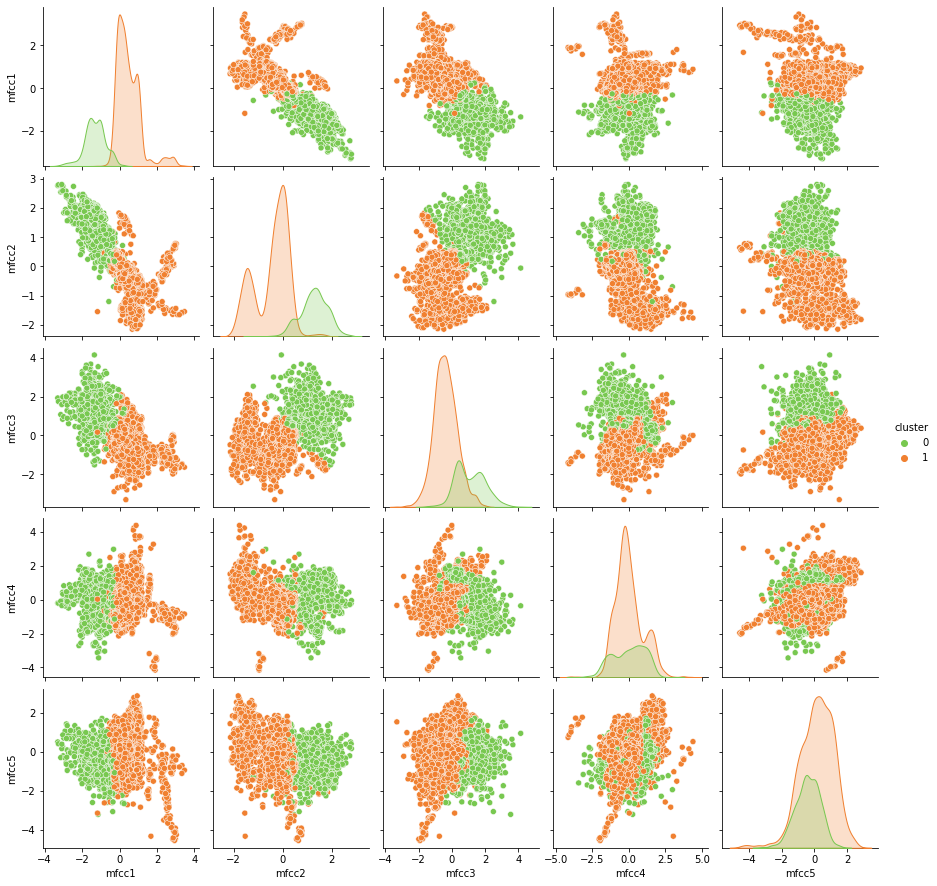

In [10]:
sns.pairplot(data_matrics_kmean, hue = 'cluster', palette=['#78C850', '#F08030'])

In [11]:
from sklearn.cluster import SpectralClustering


In [12]:
SpecCluster= SpectralClustering(n_clusters=2, assign_labels='discretize')
SpecCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(SpecCluster.labels_, name='cluster')

In [13]:
cluster_labels.value_counts()

0    4195
1      10
Name: cluster, dtype: int64

In [14]:
data_matrics_spec = data_matrics_normalized.join(cluster_labels.to_frame())

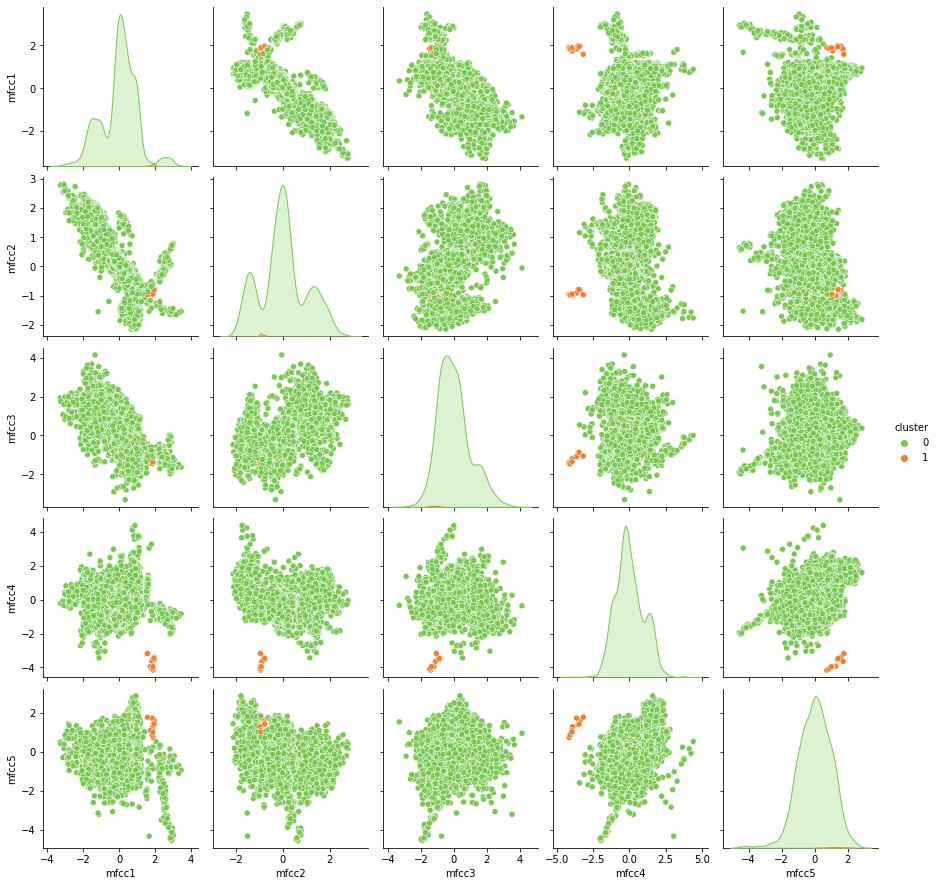

In [15]:
sns.pairplot(data_matrics_spec, hue = 'cluster', palette=['#78C850', '#F08030'])

In [27]:
from sklearn.cluster import AgglomerativeClustering

AggCluster= AgglomerativeClustering(n_clusters=8)
AggCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(AggCluster.labels_, name='cluster')
data_metrics_AggCluster = data_matrics_normalized.join(cluster_labels.to_frame())

In [28]:
cluster_labels.value_counts()

0    983
3    952
1    611
6    437
7    379
5    352
4    341
2    150
Name: cluster, dtype: int64

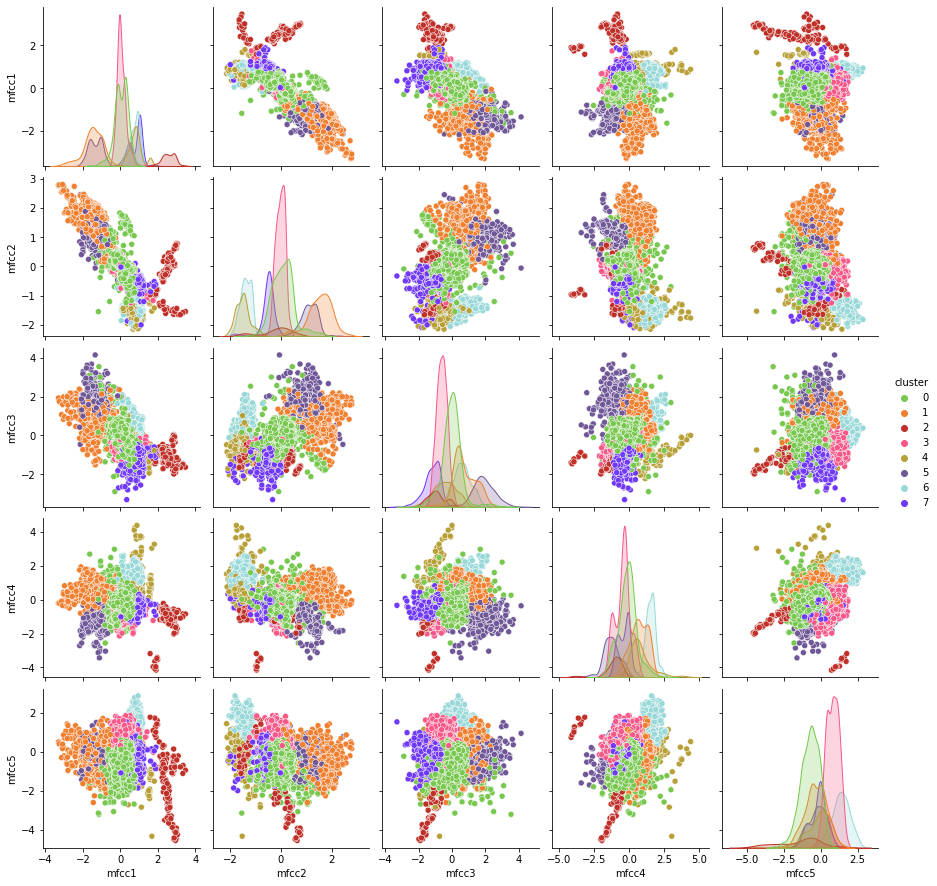

In [29]:
sns.pairplot(data_metrics_AggCluster, hue = 'cluster', palette=['#78C850', '#F08030','#C03028',  # Fighting
                       '#F85888',  # Psychic
                       '#B8A038',  # Rock
                       '#705898',  # Ghost
                       '#98D8D8',  # Ice
                       '#7038F8'])

In [19]:
from sklearn.cluster import MeanShift

AffProp= MeanShift()
AffProp.fit(data_matrics_normalized)
cluster_labels = pd.Series(AffProp.labels_, name='cluster')
data_metrics_AffProp = data_matrics_normalized.join(cluster_labels.to_frame())

In [20]:
cluster_labels.value_counts()

0    4144
2      50
1      11
Name: cluster, dtype: int64

<AxesSubplot:title={'center':'Agglomerative Clustering'}, xlabel='mfcc1', ylabel='mfcc5'>

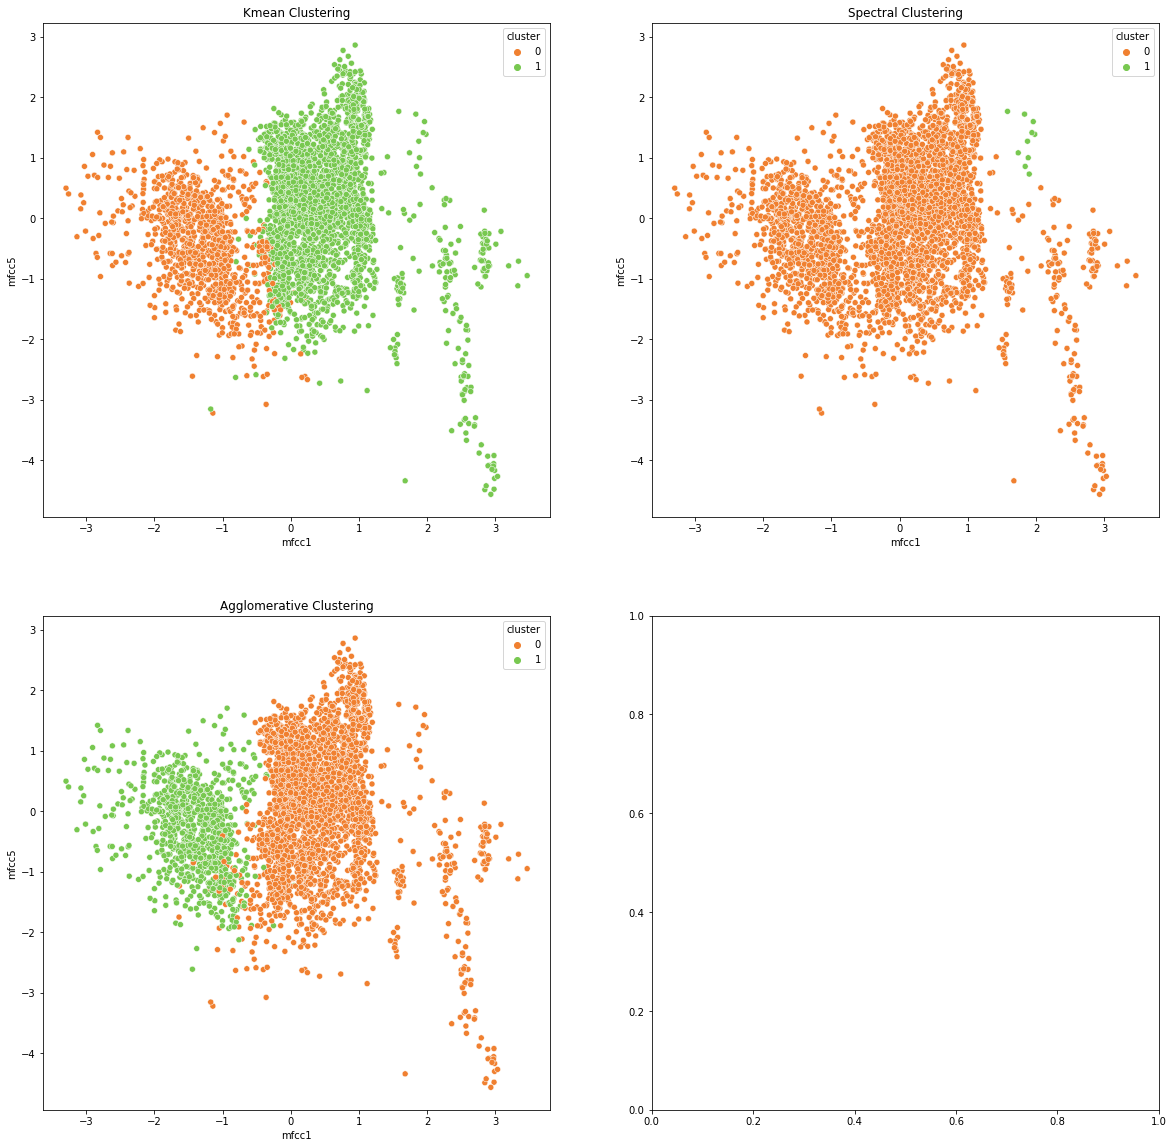

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes[0,0].title.set_text("Kmean Clustering")
axes[0,1].title.set_text("Spectral Clustering")
axes[1,0].title.set_text("Agglomerative Clustering")
# axes[1,1].title.set_text("Agglomerative Clustering")
sns.scatterplot(ax= axes[0,0], data=data_matrics_kmean, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[0,1], data=data_matrics_spec, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850'])
# sns.scatterplot(ax= axes[1,0], data=data_metrics_AffProp, x="mfcc1", y="mfcc2",hue = 'cluster', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[1,0], data=data_metrics_AggCluster, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850'])

<AxesSubplot:ylabel='mfcc1'>

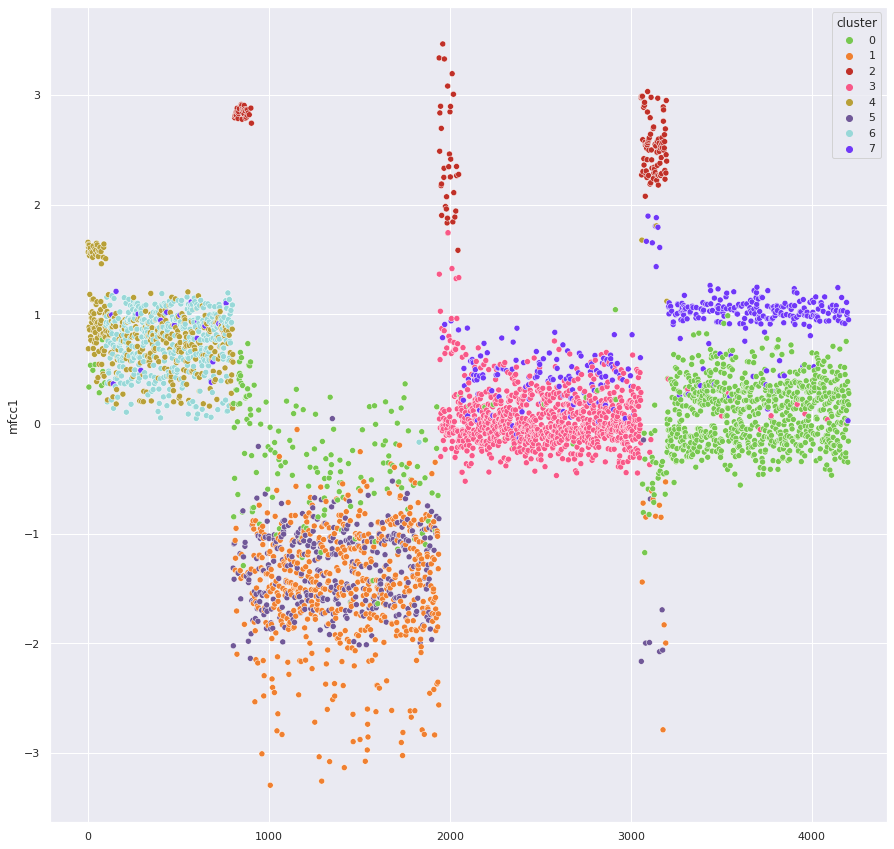

In [39]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.scatterplot(data= data_metrics_AggCluster, 
                x=data_metrics_AggCluster.index, 
                y="mfcc1", 
                hue = 'cluster', 
                palette=['#78C850', 
                                                                                              '#F08030',
                                                                                              '#C03028', 
                                                                                              '#F85888', 
                                                                                              '#B8A038',
                                                                                              '#705898',
                                                                                              '#98D8D8', 
                                                                                              '#7038F8'], 
                )